In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df=pd.read_csv(r"C:\Users\Suri\Downloads\credit_risk_dataset.csv")

In [133]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [134]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [135]:
df.shape

(32581, 12)

In [136]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [137]:
df["person_emp_length"].fillna(df["person_emp_length"].median(),inplace=True)

In [138]:
df["loan_int_rate"].fillna(df["loan_int_rate"].median(),inplace=True)

In [139]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [140]:
X=df.drop(columns=["loan_status"])
y=df["loan_status"]

In [141]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [142]:
X_train.shape

(24435, 11)

In [143]:
X_test.shape

(8146, 11)

In [144]:
y_train.shape

(24435,)

In [145]:
y_test.shape

(8146,)

In [146]:
X_train_num=X_train.select_dtypes(include=["int64","float64"])

In [147]:
X_test_num=X_test.select_dtypes(include=["int64","float64"])

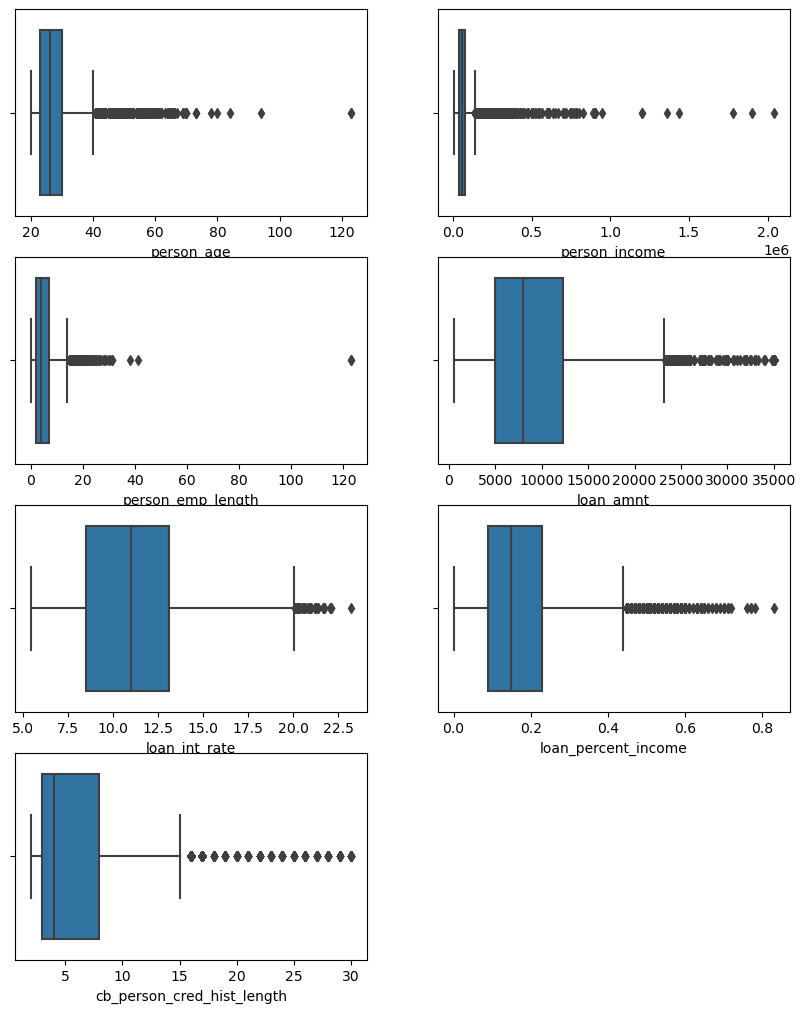

In [148]:
plt.figure(figsize=[10,22])
for i in range(len(X_train_num.columns)):
    plt.subplot(7,2,i+1)
    sns.boxplot(x=X_train_num.columns[i],data=X_train_num)

In [149]:
from sklearn.preprocessing import StandardScaler

In [150]:
scaler=StandardScaler()

In [151]:
X_train_num=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)

In [152]:
X_train_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
6249,-0.438014,-0.332166,1.016328,-0.413057,0.350920,-0.193238,-0.943072
20127,0.198380,-0.508308,-0.191679,0.059620,-0.006135,0.832867,0.536682
20796,0.357478,-0.423907,-1.158085,-0.728175,-0.450831,-0.473085,0.783308
12524,-0.915309,0.291672,-0.433281,-0.208230,0.146425,-0.659649,-0.696446
30998,1.471167,-0.258773,3.915544,0.059620,0.227574,0.179891,2.016437
...,...,...,...,...,...,...,...
32511,4.175839,0.581573,1.499530,0.059620,0.720959,-0.659649,3.496191
5192,-0.756210,-0.405485,0.533125,1.162534,-1.424618,2.045537,-0.943072
12172,-0.756210,0.144887,0.049922,2.576627,-0.006135,1.672408,-0.943072
235,-0.756210,2.163185,0.049922,-1.122073,0.266525,-1.499190,-0.943072


In [153]:
X_test_num=pd.DataFrame(scaler.transform(X_test_num),columns=X_test_num.columns,index=X_test_num.index)

In [154]:
X_test_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
29088,-0.119817,-0.334001,-0.916484,-0.334278,0.798862,-0.099955,0.043431
24708,0.993872,0.126538,-1.158085,0.059620,0.032816,-0.286520,1.029934
22316,0.675675,-0.222077,2.707537,0.059620,-1.061071,0.179891,0.290056
15922,-0.756210,-0.515648,-0.433281,1.595822,-1.135728,3.258207,-0.449821
4987,-0.597112,-0.423980,0.049922,-0.728175,-1.255829,-0.473085,-0.449821
...,...,...,...,...,...,...,...
24462,0.039281,-0.313891,1.741132,0.059620,-0.207384,0.273174,0.783308
19822,0.039281,-0.640415,-0.433281,-0.948758,-1.499275,-0.473085,0.290056
22202,0.675675,-0.240425,-0.916484,-0.444569,0.594367,-0.379802,0.290056
17254,-0.597112,0.805421,0.533125,0.374738,-0.671556,-0.566367,-0.943072


In [155]:
X_train_cat=X_train.select_dtypes(include=["object"])

In [156]:
X_test_cat=X_test.select_dtypes(include=["object"])

In [157]:
X_train_cat.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [158]:
X_train_cat_ohe=X_train_cat[['person_home_ownership', 'loan_intent','cb_person_default_on_file']]

In [159]:
X_test_cat_ohe=X_test_cat[['person_home_ownership', 'loan_intent','cb_person_default_on_file']]

In [160]:
from sklearn.preprocessing import OneHotEncoder

In [161]:
encoder=OneHotEncoder(drop="first",sparse=False)

In [162]:
X_train_cat_ohe=pd.DataFrame(encoder.fit_transform(X_train_cat_ohe),
                             columns=encoder.get_feature_names_out(X_train_cat_ohe.columns),
                            index=X_train_cat_ohe.index)

In [163]:
X_train_cat_ohe

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
6249,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
20127,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20796,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
12524,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30998,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32511,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
5192,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [164]:
X_test_cat_ohe=pd.DataFrame(encoder.transform(X_test_cat_ohe),
                             columns=encoder.get_feature_names_out(X_test_cat_ohe.columns),
                            index=X_test_cat_ohe.index)

In [165]:
X_train_cat["loan_grade"].value_counts()

A    8092
B    7869
C    4816
D    2696
E     732
F     185
G      45
Name: loan_grade, dtype: int64

In [166]:
X_train_cat_le=X_train_cat["loan_grade"]
X_test_cat_le=X_test_cat["loan_grade"]

In [167]:
dic={"G":1,"F":2,"E":3,"D":4,"C":5,"B":6,"A":7}

X_train_cat_le = X_train_cat_le.apply(lambda x :dic[x])

In [168]:
X_test_cat_le=X_test_cat_le.apply(lambda x:dic[x])

In [169]:
X_train_cat=pd.concat([X_train_cat_ohe,X_train_cat_le],axis=1)

In [170]:
X_train_cat

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y,loan_grade
6249,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5
20127,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6
20796,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,6
12524,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6
30998,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...
32511,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5
5192,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7
12172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
235,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6


In [171]:
X_test_cat=pd.concat([X_test_cat_ohe,X_test_cat_le],axis=1)

In [172]:
X_train_transformed=pd.concat([X_train_cat,X_train_num],axis=1)

In [173]:
X_test_transformed=pd.concat([X_test_cat,X_test_num],axis=1)

# Logistic Regression

In [177]:
from sklearn.metrics import accuracy_score

In [174]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [175]:
y_test_pred = classifier.predict(X_test_transformed)

In [178]:
accuracy_score(y_test, y_test_pred)

0.8494966854898109

# KNN

In [179]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)
accuracy_score(y_test, y_test_pred)

C:\Users\Suri\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8889025288485146

# Decision Tree Classifier

In [181]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

accuracy_score(y_test, y_test_pred)

0.8902528848514608

# Random Forest Classifier

In [182]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

accuracy_score(y_test, y_test_pred)

0.9330959980358459

# Support Vector Machine¶

In [183]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train_transformed,y_train)

y_test_pred=classifier.predict(X_test_transformed)
accuracy_score(y_test, y_test_pred)

0.8886570095752516